# Linear Regression

In [64]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from warnings import warn("ignore")

In [2]:
from sklearn.datasets import load_boston

In [57]:
df=load_boston()
df

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
dataset=pd.DataFrame(df.data,columns=df.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
dataset["price"]=df.target

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Independent feature
x=dataset.iloc[:,:-1]
#Dependent feature
y=dataset.iloc[:,-1]

In [8]:
#importing LinearRegression package
from sklearn.linear_model import LinearRegression

In [9]:
#creating model object
regressor=LinearRegression()

In [10]:
#importing cross_val_score
from sklearn.model_selection import cross_val_score

In [11]:
#applying cross_val_score
#neg_mean_squared_error can be found from below link
#https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
mse=cross_val_score(regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [12]:
np.mean(mse)

-37.13180746769922

# Ridge Regression

In [27]:
#importing library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
ridge

Ridge()

In [29]:
parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [30]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
print(ridge_regressor.best_params_)

{'alpha': 50}


In [32]:
print(ridge_regressor.best_score_)

-30.7700007965976


# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [34]:
lasso=Lasso()

In [35]:
parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [36]:
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+03, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error')

In [37]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [38]:
print(lasso_regressor.best_score_)

-35.531580220694856


# Elastic Net 

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [40]:
elastic_net=ElasticNet()

In [41]:
parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [43]:
elastic_regressor=GridSearchCV(elastic_net,parameters,scoring='neg_mean_squared_error')
elastic_regressor.fit(x,y)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.857e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.169e+03, toleranc

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error')

In [44]:
print(elastic_regressor.best_params_)

{'alpha': 1}


In [45]:
print(elastic_regressor.best_score_)

-32.05368976651791


# Building Model

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [64]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

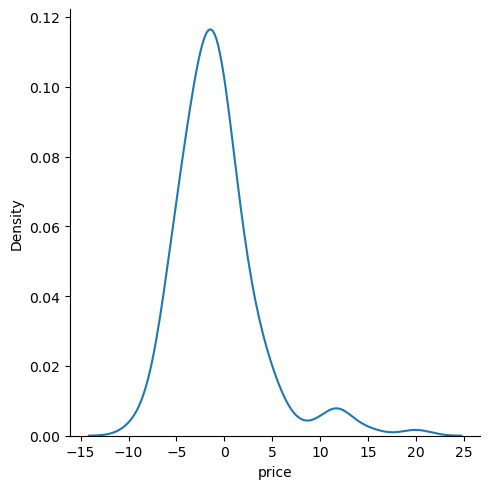

In [72]:
#error curve
import seaborn as sns
sns.displot(y_test-prediction_lasso,kind='kde')
plt.show()

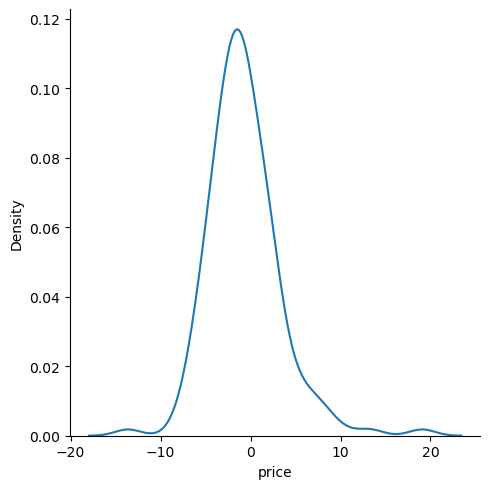

In [73]:
sns.displot(y_test-prediction_ridge,kind='kde')
plt.show()

# R-square and Adjusted R-square

In [77]:
#performance metrics
from sklearn.metrics import r2_score

In [75]:
r2_score(y_test,prediction_lasso)

0.7544918781250872

In [76]:
r2_score(y_test,prediction_ridge)

0.7931572185933052